In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('key_features_sleep_health.csv')
df.head()

,BMI Category_Normal,BMI Category_Overweight,Occupation_Nurse,Mean Arterial Pressure,Sleep Duration,Age,Physical Activity Level,Person ID,Sleep Disorder
0,0.0,1.0,0.0,-0.293892,-1.298887,-1.753096,-0.825418,1,0
1,1.0,0.0,0.0,-0.645382,-1.173036,-1.637643,0.039844,2,0
2,1.0,0.0,0.0,-0.645382,-1.173036,-1.637643,0.039844,3,0
3,0.0,0.0,0.0,1.112065,-1.550588,-1.637643,-1.402260,4,1
4,0.0,0.0,0.0,1.112065,-1.550588,-1.637643,-1.402260,5,1


In [3]:
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [7]:
# prepare data for machine learning
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
# train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# model accuracy for X_test  
accuracy = accuracy_score(y_test, rf_predictions)

# creating a confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

In [11]:
print(f'random forest accuracy: {accuracy}')
print(f'random forest confusion matrix: \n {cm}')

random forest accuracy: 0.8723404255319149
random forest confusion matrix: 
 [[52  0  3]
 [ 3 15  4]
 [ 1  1 15]]


In [13]:
# train SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [15]:
print(f'SVC accuracy is {accuracy}')
print(f'SVC confusion matrix: \n {cm}')

SVC accuracy is 0.8829787234042553
SVC confusion matrix: 
 [[52  0  3]
 [ 3 16  3]
 [ 1  1 15]]


In [17]:
# train KNN
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)

# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

In [19]:
print(f'KNN accuracy is {accuracy}')
print(f'KNN confusion matrix: \n {cm}')

KNN accuracy is 0.8936170212765957
KNN confusion matrix: 
 [[54  0  1]
 [ 5 16  1]
 [ 1  2 14]]


In [21]:
# training a Naive Bayes classifier
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, y_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

In [23]:
print(f'NB accuracy is {accuracy}')
print(f'NB confusion matrix: \n {cm}')

NB accuracy is 0.8723404255319149
NB confusion matrix: 
 [[52  0  3]
 [ 3 15  4]
 [ 1  1 15]]


# Fine-tuning models

In [26]:
svc = SVC(random_state=42)
cv_scores = cross_val_score(svc, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f}")

Cross-validation scores: [0.66666667 0.96       1.         0.98666667 0.62162162]
Mean CV score: 0.847


In [28]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.885


In [29]:
# train SVC using the best parameters
svm_model = SVC(kernel='rbf', C=100, gamma='scale', random_state=42).fit(X_train, y_train)

# make predictions
svm_predictions = svm_model.predict(X_test)

# calculate model accuracy
accuracy = svm_model.score(X_test, y_test)
print(f"Best model accuracy: {accuracy:.3f}")

# create confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:")
print(cm)

Best model accuracy: 0.894
Confusion Matrix:
[[54  0  1]
 [ 3 16  3]
 [ 1  2 14]]


In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

In [31]:
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f}")

Cross-validation scores: [0.83928571 0.875      0.92857143 0.92857143 0.91071429]
Mean CV score: 0.896


In [32]:
best_rf = RandomForestClassifier(**grid_search.best_params_, class_weight='balanced', random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42)

In [33]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.89      0.73      0.80        22
           2       0.78      0.82      0.80        17

    accuracy                           0.89        94
   macro avg       0.87      0.84      0.85        94
weighted avg       0.89      0.89      0.89        94



In [36]:
importances = best_rf.feature_importances_
feature_imp = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_imp = feature_imp.sort_values('importance', ascending=False)
print(feature_imp)

                   feature  importance
3   Mean Arterial Pressure    0.252380
0      BMI Category_Normal    0.144348
5                      Age    0.130470
4           Sleep Duration    0.121186
6  Physical Activity Level    0.119019
2         Occupation_Nurse    0.117823
1  BMI Category_Overweight    0.114773


I want to prioritize the ability to look at feature importance, so let's use Random Forest

# Evaluate the model

In [39]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Predict probabilities for the test data
y_score = rf_model.predict_proba(X_test)

In [40]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

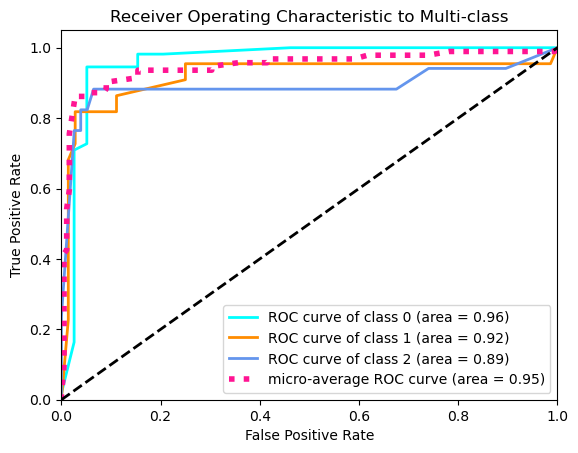

In [41]:
# Plot all ROC curves
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()

# Save Model

In [51]:
best_model = best_rf
joblib.dump(best_model, 'sleep_disorder_model.joblib')

['sleep_disorder_model.joblib']